# Following code is taken from:
https://www.geeksforgeeks.org/cross-validation-using-k-fold-with-scikit-learn/

In [18]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import KFold

# synthetic regression dataset
X, y = datasets.make_regression(
  n_samples=20, n_features=1, n_informative=1,
  noise=0, random_state=0)

# KFold split
kf = KFold(n_splits=4)
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i}:")
    print(f"  Training dataset index: {train_index}")
    print(f"  Test dataset index: {test_index}")
kf.get_n_splits(X)


Fold 0:
  Training dataset index: [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
  Test dataset index: [0 1 2 3 4]
Fold 1:
  Training dataset index: [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19]
  Test dataset index: [5 6 7 8 9]
Fold 2:
  Training dataset index: [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19]
  Test dataset index: [10 11 12 13 14]
Fold 3:
  Training dataset index: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
  Test dataset index: [15 16 17 18 19]


4

In [24]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np
# define dataset
n_samples = 500
X, y = make_classification(
  n_samples=n_samples, n_features=20, n_informative=15, n_redundant=5)

# prepare the K-Fold cross-validation procedure
n_splits = 10
cv = KFold(n_splits=n_splits)


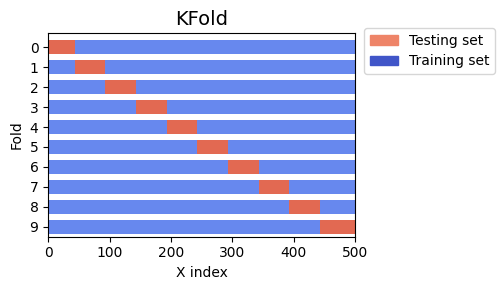

In [25]:
def plot_kfold(cv, X, y, ax, n_splits, xlim_max):
    """
    Plots the indices for a cross-validation object.

    Parameters:
    cv: Cross-validation object
    X: Feature set
    y: Target variable
    ax: Matplotlib axis object
    n_splits: Number of folds in the cross-validation
    xlim_max: Maximum limit for the x-axis
    """

    # Set color map for the plot
    cmap_cv = plt.cm.coolwarm
    cv_split = cv.split(X=X, y=y)

    for i_split, (train_idx, test_idx) in enumerate(cv_split):
        # Create an array of NaNs and fill in training/testing indices
        indices = np.full(len(X), np.nan)
        indices[test_idx], indices[train_idx] = 1, 0

        # Plot the training and testing indices
        ax_x = range(len(indices))
        ax_y = [i_split + 0.5] * len(indices)
        ax.scatter(ax_x, ax_y, c=indices, marker="_",
                   lw=10, cmap=cmap_cv, vmin=-0.2, vmax=1.2)

    # Set y-ticks and labels
    y_ticks = np.arange(n_splits) + 0.5
    ax.set(yticks=y_ticks, yticklabels=range(n_splits),
           xlabel="X index", ylabel="Fold",
           ylim=[n_splits, -0.2], xlim=[0, xlim_max])

    # Set plot title and create legend
    ax.set_title("KFold", fontsize=14)
    legend_patches = [Patch(color=cmap_cv(0.8), label="Testing set"),
                      Patch(color=cmap_cv(0.02), label="Training set")]
    ax.legend(handles=legend_patches, loc=(1.03, 0.8))

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 3))
plot_kfold(cv, X, y, ax, n_splits, n_samples)
plt.tight_layout()
fig.subplots_adjust(right=0.6)


In [26]:
from numpy import mean
from numpy import std

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# create model
log_reg = LogisticRegression()
# evaluate model
scores = cross_val_score(
    log_reg, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# accuracy
print('Scores:', scores)
print('Accuracy: %.3f ,\nStandard Deviation :%.3f' %
      (mean(scores), std(scores)))


Scores: [0.86 0.82 0.82 0.78 0.8  0.86 0.84 0.9  0.74 0.82]
Accuracy: 0.824 ,
Standard Deviation :0.043


In [12]:
from sklearn.datasets import fetch_california_housing

# fetch california housing data
housing = fetch_california_housing()
print("Dataset Shape:", housing.data.shape, housing.target.shape)
print("Dataset Features:", housing.feature_names)


Dataset Shape: (20640, 8) (20640,)
Dataset Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import numpy as np

X_housing = housing.data
y_housing = housing.target

# Scaling the data
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X_housing)

# K-Fold split
cnt = 0
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle = True, random_state=42)
for train_index, test_index in kf.split(X_scaler, y_housing):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, \
    Test set:{len(test_index)}')
    cnt += 1


Fold:0, Train set: 16512,     Test set:4128
Fold:1, Train set: 16512,     Test set:4128
Fold:2, Train set: 16512,     Test set:4128
Fold:3, Train set: 16512,     Test set:4128
Fold:4, Train set: 16512,     Test set:4128


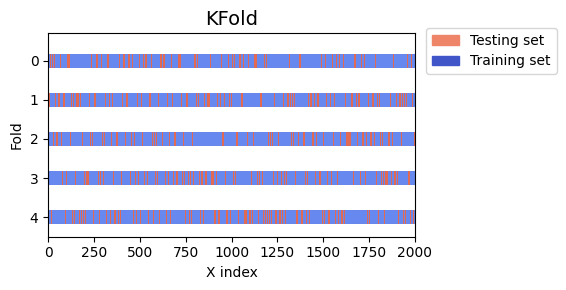

In [56]:
fig, ax = plt.subplots(figsize=(6, 3))
plot_kfold(kf, X_scaler, y_housing, ax, n_splits, xlim_max=2000)
# Make the legend fit
plt.tight_layout()
fig.subplots_adjust(right=0.7)


In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score

def cross_validation(reg_model, housing_prepared, housing_labels, cv):
    scores = cross_val_score(
      reg_model, housing_prepared,
      housing_labels,
      scoring="neg_mean_squared_error", cv=cv)
    rmse_scores = np.sqrt(-scores)
    print("Scores:", rmse_scores)
    print("Mean:", rmse_scores.mean())
    print("StandardDeviation:", rmse_scores.std())

print("----- Linear Regression Model Cross Validation ------")
lin_reg = LinearRegression()
cross_validation(lin_reg, X_scaler, y_housing, kf)
#print("")
#print("----- Decision Tree Regression Model Cross Validation ------")
#tree_reg = DecisionTreeRegressor()
#cross_validation(tree_reg, X_scaler, y_housing, kf)
#print("")
#print("----- Random Forest Regression Model Cross Validation ------")
#forest_reg = RandomForestRegressor()
#cross_validation(forest_reg, X_scaler, y_housing, kf)



----- Linear Regression Model Cross Validation ------
Scores: [0.74558138 0.72639951 0.71364081 0.71052852 0.74510434]
Mean: 0.7282509142479745
StandardDeviation: 0.014935522116016313
